In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sb
import matplotlib.pyplot as plt

all_files = glob.glob("/Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Typhoon Ruby" + "/*.csv")

In [2]:
def extractText(csv):
    print("Reading "+csv)
    file = pd.read_csv(csv)
    return (list(file.iloc[:,0]))

rubyComments = []
rubyTimes = []

for item in all_files:
    rubyComments.extend(extractText(item))
    rubyTimes.extend(extractText(item))

Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Typhoon Ruby/Ruby Comments 1 - Sheet1.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Typhoon Ruby/Ruby Comments 1 - Sheet1.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Typhoon Ruby/Ruby Comments 10 - Sheet1.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Typhoon Ruby/Ruby Comments 10 - Sheet1.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Typhoon Ruby/Ruby Comments 11 - Sheet1.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Typhoon Ruby/Ruby Comments 11 - Sheet1.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Typhoon Ruby/Ruby Comments 12 - Sheet1.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Typhoon Ruby/Ruby Comments 12 - Sheet1.csv
Reading /Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Typhoon Ruby/Ruby Comments 13 - Sheet1.csv
Reading /Users/lorenzoflores/D

#### Lots of Data Cleaning

In [3]:
import re
def clean(string):
    string = str(string).lower()
    string = string.split("december",1)[0]
    string = string.split("http",1)[0]
    string = string.replace('.',' ')
    string = string.replace(',',' ')
    string = string.replace("'",' ')
    string = string.replace("!",' ')
    
    string = string.replace("\n"," ")
    string = re.sub('\d', ' ', string)
    return (string)

In [4]:
for i in range(len(rubyComments)):
    rubyComments[i] = clean(rubyComments[i])

In [5]:
tokens = []
for comment in rubyComments:
    processed = comment.lower().strip().split(' ')
    tokens.append(processed)

In [8]:
tokensProcessed = []
for comment in tokens:
    commentWords = []
    for word in comment:
        if word == '':
            pass
        if '?' in word:
            commentWords.append(word[-1])
            commentWords.append(word[0:len(word)])
        elif word == '.':
            pass
        elif word == 'tau':
            commentWords.append('tayo')
        elif word in ['bkt','bakt']:
            commentWords.append('bakit')
        elif word in ['ngaun','ngayn']:
            commentWords.append('ngayn')
        elif word in ['kbbyan','kababayans','kbabayan']:
            commentWords.append('kababayan')
        elif word == 'nman':
            commentWords.append('naman')
        elif word in ['lng','lang','nlng']:
            commentWords.append('nalang')
        elif word == 'sna':
            commentWords.append('sana')
        elif word == 'don':
            commentWords.append('doon')
        elif word in ['thx','tnx','thanxs']:
            commentWords.append('thanks')
        elif word in ['sgnal','cignal']:
            commentWords.append('signal')
        else:
            commentWords.append(word)
    tokensProcessed.append(commentWords)

In [9]:
from collections import Counter
vocab = Counter()
for token in tokensProcessed:
    vocab.update(token)

In [10]:
tokens = []
for token in vocab.elements():
    if vocab[token] >= 25:
        tokens.append(token)
vocab = Counter(tokens)

In [11]:
stop_words = []
for item in vocab.most_common(25):
    stop_word = item[0]
    stop_words.append(stop_word)

In [12]:
stop_words

['',
 '·',
 'sa',
 'ang',
 'na',
 'the',
 'po',
 'god',
 'ng',
 'and',
 'lord',
 'us',
 'amen',
 '?',
 'to',
 'is',
 'of',
 'in',
 'at',
 'nalang',
 'you',
 'for',
 'pray',
 'ruby',
 'pa']

In [13]:
stop_words.remove('amen')
stop_words.remove('nalang')
stop_words.remove('god')
stop_words.remove('pray')
stop_words.remove('ruby')
stop_words.remove('lord')
stop_words.remove('?')

In [14]:
tokens = []
for token in vocab.elements():
    if token not in stop_words:
        tokens.append(token)
vocab = Counter(tokens)

In [15]:
lst = ['yan','ka','i','as','so','or','ay','nag','a',
       'poh','are','nga','mag','n','m','ma','mo','eh',
       'do','ni','di','it','be','u','t','d','nyo',
       'nya','with','ung','e','maria','jr','dela','cruz',
       'ann','si','&','sya','but','#','an','de','xa',
       'dec','nmn','\xa0\xa0\xa0\xa0','b','c','o','p','no','nan']
for word in lst:
    vocab.pop(word)

In [16]:
items = vocab.items()
id2word = {}
word2id = {}
idx = 0
for word, count in vocab.items():
    id2word[idx] = word
    word2id[word] = idx
    idx += 1

In [17]:
temp = []
for comment in tokensProcessed:
    filtered = []
    for token in comment:
        if token in vocab:
            filtered.append(token)
    temp.append(filtered)
tokensProcessed = temp

In [18]:
corpus = []
for tweet in tokensProcessed:
    tweet_count = Counter(tweet)
    corpus_doc = []
    for item in tweet_count.items():
        pair = (word2id[item[0]], item[1])
        corpus_doc.append(pair)
    corpus.append(corpus_doc)

In [22]:
import gensim
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=7, 
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            per_word_topics=True)

In [23]:
import numpy as np
import pandas as pd
num_topics = 7
num_words = 15
top_words = pd.DataFrame({'word rank': np.arange(1,num_words+1)})
for k in np.arange(num_topics): 
    topic = lda_model.get_topic_terms(k, num_words)
    words = [id2word[topic[i][0]] for i in np.arange(num_words)]
    probs = [topic[i][1] for i in np.arange(num_words)]
    top_words['topic %d' % k] = words

In [24]:
top_words

,word rank,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6
0,1,amen,god,?,we,mga,humina,pray
1,2,tayo,lord,thanks,jesus,nalang,more,this
2,3,ingat,all,s,our,sana,will,that
3,4,hindi,ruby,update,typhoon,bagyo,good,pls
4,5,wag,thank,info,your,may,see,prayer
5,6,mark,keep,weather,emoticon,pagasa,prayers,save
6,7,always,safe,kami,from,pag,salamat,not
7,8,yung,please,signal,have,storm,now,family
8,9,rin,on,faith,sarah,lahat,santos,samar
9,10,kababayan,my,updates,mercy,ba,yolanda,time


In [28]:
top_words.columns = ['word rank','Religious/Safety/Filipinos','Religious',
                     'Asking for Updates','Scared/Asking for Mercy',
                     'Hopeful','Giving Updates','Prayers/Family']
labels = {'topic_num':range(7), 'topic_label':top_words.columns[1:]}
labels = pd.DataFrame(labels)

def create_topic_table(comments, corpus, lda_model):   
    # initialize some arrays
    probs = []
    topic = []
    label = []
    comms = []
    for i in range(len(corpus)):
        comms.append(comments[i][0:200])
        
        topic_dist = lda_model.get_document_topics(corpus[i])
        maxIndex = np.argmax([item[1] for item in topic_dist])
        topic.append(topic_dist[maxIndex][0])
        probs.append(topic_dist[maxIndex][1])
        label.append(labels['topic_label'][np.where(labels['topic_num'] == topic_dist[maxIndex][0])[0][0]])
    
    table = pd.DataFrame()
    table['Topic'] = topic
    table['Label'] = label
    table['Probability'] = probs
    table['Comment'] = comms
    return table

topic_table = create_topic_table(rubyComments, corpus, lda_model)
topic_table

False

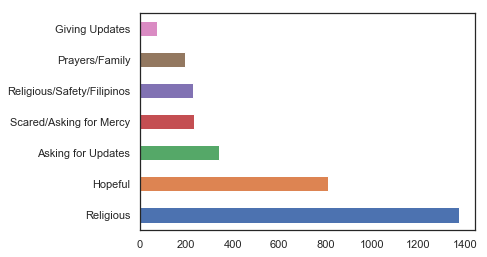

In [46]:
plt.style.use('seaborn-ticks')
topic_table['Label'].value_counts().plot(kind='barh')

In [30]:
import csv
topic_table.to_csv('/Users/lorenzoflores/Desktop/Yale_Academic/Stat Projects/Typhoon Ruby/comment_predictions.csv')

In [55]:
data = pd.read_csv(all_files[0])
for csv in all_files[1:]:
    file = pd.read_csv(csv)
    data = pd.concat([data,file],ignore_index=True)

In [72]:
data = data.fillna(0)

In [132]:
topics = []
totalTopics = []
for i in range(len(data)):
    ans = []
    if data.iloc[i,7] == 1 or data.iloc[i,8] == 1 or data.iloc[i,10] == 1 or data.iloc[i,9] == 1 or data.iloc[i,11] == 1:
        ans.append('Religious')
        totalTopics.append('Religious')
    
    if data.iloc[i,12] == 1:
        ans.append('Giving Updates')
        totalTopics.append('Giving Updates')
    
    if data.iloc[i,18] == 1 or data.iloc[i,17] == 1 or data.iloc[i,7] == 1 or data.iloc[i,8] == 1 or data.iloc[i,10] == 1 or data.iloc[i,9] == 1 or data.iloc[i,11] == 1:
        ans.append('Religious/Safety/Filipinos')
        totalTopics.append('Religious/Safety/Filipinos')
        
    if data.iloc[i,10] == 1 or data.iloc[i,16] == 1:
        ans.append('Prayers/Family')
        totalTopics.append('Prayers/Family')
        
    if data.iloc[i,4] == 1 or data.iloc[i,5] == 1 or data.iloc[i,6] == 1:
        ans.append('Scared/Asking for Mercy')
        totalTopics.append('Scared/Asking for Mercy')
        
    if data.iloc[i,13] == 1:
        ans.append('Asking for Updates')
        totalTopics.append('Asking for Updates')
        
    if data.iloc[i,1] == 1 or data.iloc[i,2] == 1 or data.iloc[i,3] == 1:
        ans.append('Hopeful')
        totalTopics.append('Hopeful')
        
    else:
        ans.append('Other')
        totalTopics.append('Other')
        
    topics.append(ans)
        

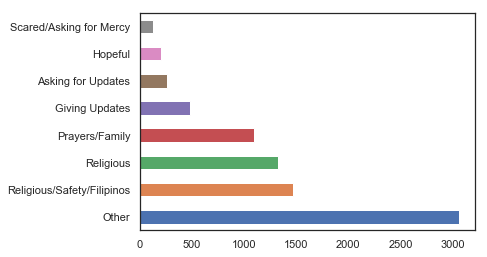

In [133]:
plt.style.use('seaborn-ticks')

totalTopics = pd.DataFrame(totalTopics, columns = ['Major Category'])
totalTopics['Major Category'].value_counts().plot(kind='barh')

In [134]:
data['Predicted'] = topic_table['Label']
data['Major Category'] = topics

In [147]:
score = []
for i in range(len(data)):
    if data['Predicted'][i] in data['Major Category'][i]:
        score.append(1)
    elif len(data['Major Category'][i]) == 1 and 'Other' in data['Major Category'][i]:
        score.append(None)
    else:
        score.append(0)
data['Score'] = score

In [144]:
sum([item for item in score if item != None])/len([item for item in score if item != None])

0.48782501031778785

In [145]:
askin = [index for index,item in enumerate(data['Major Category']) if 'Asking for Updates' in item]
givin = [index for index,item in enumerate(data['Major Category']) if 'Giving Updates' in item]
hopin = [index for index,item in enumerate(data['Major Category']) if 'Hopeful' in item]
praye = [index for index,item in enumerate(data['Major Category']) if 'Prayers/Family' in item]
relig = [index for index,item in enumerate(data['Major Category']) if 'Religious' in item]
relsa = [index for index,item in enumerate(data['Major Category']) if 'Religious/Safety/Filipinos' in item]
scare = [index for index,item in enumerate(data['Major Category']) if 'Scared/Asking for Mercy' in item]

In [153]:
print('Asking for Updates: '+str(np.mean(data.iloc[askin,:]['Score'])))
print('Giving Updates: '+str(np.mean(data.iloc[givin,:]['Score'])))
print('Hopeful: '+str(np.mean(data.iloc[hopin,:]['Score'])))
print('Prayers/Family: '+str(np.mean(data.iloc[praye,:]['Score'])))
print('Religious: '+str(np.mean(data.iloc[relig,:]['Score'])))
print('Religious/Safety/Filipinos: '+str(np.mean(data.iloc[relsa,:]['Score'])))
print('Scared/Asking for Mercy: '+str(np.mean(data.iloc[scare,:]['Score'])))

Asking for Updates: 0.4559386973180077
Giving Updates: 0.12708333333333333
Hopeful: 0.5445544554455446
Prayers/Family: 0.6718606782768103
Religious: 0.7062831188493566
Religious/Safety/Filipinos: 0.6498293515358362
Scared/Asking for Mercy: 0.136
